In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Discontinued Products

In [2]:
df_2019 = pd.read_csv("df_2019.csv")

In [3]:
df_2019.shape

(19815527, 9)

In [4]:
inicio_analise = pd.read_csv("inicio_analise.csv")

In [5]:
inicio_analise.shape

(86161477, 9)

In [6]:
df_16_18 = inicio_analise.loc[inicio_analise['Date'] < '2019-01-01']

In [7]:
df_16_18.shape

(66345950, 9)

In [8]:
df_2019.head(2)

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
0,13,18,1473,2731,8396,57,2019-01-01,1.0,645.0
1,16,11,158,328,1129,108,2019-01-01,2.0,1690.0


In [9]:
df_2019 = df_2019.loc[df_2019['values'] >= 0]

In [10]:
df_16_18 = df_16_18.loc[df_16_18['values'] >= 0]

In [11]:
prod2019 = list(df_2019['ProductName_ID'].unique())

In [12]:
len(prod2019)

2258

In [13]:
prod2016_2018 = list(df_16_18['ProductName_ID'].unique())

In [14]:
len(prod2016_2018)

2597

In [15]:
discontinued = list(set(prod2016_2018) - set(prod2019))

In [16]:
len(discontinued)

537

In [17]:
new = list(set(prod2019) - set(prod2016_2018))
len(new)

198

**Remove the discontinued products from df_16_18**

In [18]:
df_16_18 = df_16_18[~df_16_18.ProductName_ID.isin(discontinued)]

In [19]:
len(list(df_16_18['ProductName_ID'].unique()))

2060

In [20]:
df_16_18['Date'] = pd.to_datetime(df_16_18['Date']) 

In [21]:
#df_16_18.to_csv(r'C:\Users\sorai\Desktop\BCwDS\BC5_demand_forecasting\df_16_18.csv', index=False)

In [22]:
df_2019.head()

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
0,13,18,1473,2731,8396,57,2019-01-01,1.0,645.0
1,16,11,158,328,1129,108,2019-01-01,2.0,1690.0
2,21,34,230,488,1593,77,2019-01-01,1.0,3495.0
3,15,2,11,38,82,249,2019-01-01,2.0,1200.0
4,12,178,508,1016,3060,400,2019-01-01,2.0,2360.0


## Demand Forecasting

In [23]:
frames=[df_16_18,df_2019]
retail=pd.concat(frames)

In [24]:
retail.head()

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
0,1,33,1092,2008,6099,240,2016-01-01 00:00:00,1.0,450.0
1,21,22,1425,2665,8218,123,2016-01-01 00:00:00,3.0,2580.0
2,21,122,779,1514,4620,282,2016-01-01 00:00:00,1.0,7899.0
3,14,27,226,481,1572,110,2016-01-01 00:00:00,4.0,2510.0
4,16,11,950,1807,5457,78,2016-01-01 00:00:00,1.0,780.0


In [25]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85969827 entries, 0 to 19815526
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ProductFamily_ID    int64  
 1   ProductCategory_ID  int64  
 2   ProductBrand_ID     int64  
 3   ProductName_ID      int64  
 4   ProductPackSKU_ID   int64  
 5   Point-of-Sale_ID    int64  
 6   Date                object 
 7   units               float64
 8   values              float64
dtypes: float64(2), int64(6), object(1)
memory usage: 6.4+ GB


Following: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [26]:
retail_1_664=retail.loc[retail["ProductName_ID"]==664]
retail_1_664

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
318,21,13,320,664,1998,1,2016-01-01 00:00:00,2.0,214.0
1831,21,13,320,664,1998,368,2016-01-01 00:00:00,8.0,800.0
2375,21,13,320,664,1998,342,2016-01-01 00:00:00,1.0,83.0
2995,21,13,320,664,1999,215,2016-01-01 00:00:00,2.0,440.0
3161,21,13,320,664,1998,393,2016-01-01 00:00:00,3.0,390.0
...,...,...,...,...,...,...,...,...,...
19810197,21,13,320,664,1999,256,2019-11-01,1.0,193.0
19810233,21,13,320,664,1999,257,2019-11-01,1.0,185.0
19810956,21,13,320,664,1998,1,2019-11-01,2.0,200.0
19815360,21,13,320,664,1999,345,2019-11-01,2.0,376.0


In [27]:
retail_1_664=retail_1_664[["Date","units"]]

In [28]:
retail_1_664['Date'] = pd.to_datetime(retail_1_664['Date']) 

<ipython-input-28-3f253890ac46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_1_664['Date'] = pd.to_datetime(retail_1_664['Date'])


In [29]:
retail_1_664 = retail_1_664.sort_values('Date')
retail_1_664.isnull().sum()

Date     0
units    0
dtype: int64

In [30]:
retail_1_664 = retail_1_664.groupby('Date')['units'].sum().reset_index()
retail_1_664

,Date,units
0,2016-01-01,30.0
1,2016-01-02,153.0
2,2016-01-03,26.0
3,2016-01-04,117.0
4,2016-01-05,103.0
...,...,...
1396,2019-10-28,112.0
1397,2019-10-29,79.0
1398,2019-10-30,78.0
1399,2019-10-31,83.0


In [31]:
retail_1_664 = retail_1_664.set_index('Date')
retail_1_664.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
               '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-11-01'],
              dtype='datetime64[ns]', name='Date', length=1401, freq=None)

In [32]:
y = retail_1_664['units'].resample('W-MON').sum()
y['2016':]

Date
2016-01-04    326.0
2016-01-11    794.0
2016-01-18    920.0
2016-01-25    660.0
2016-02-01    912.0
              ...  
2019-10-07    354.0
2019-10-14    451.0
2019-10-21    456.0
2019-10-28    565.0
2019-11-04    262.0
Freq: W-MON, Name: units, Length: 201, dtype: float64

In [33]:
y['2019':]

Date
2019-01-07    689.0
2019-01-14    897.0
2019-01-21    803.0
2019-01-28    768.0
2019-02-04    790.0
2019-02-11    710.0
2019-02-18    640.0
2019-02-25    603.0
2019-03-04    584.0
2019-03-11    489.0
2019-03-18    480.0
2019-03-25    470.0
2019-04-01    464.0
2019-04-08    443.0
2019-04-15    502.0
2019-04-22    369.0
2019-04-29    368.0
2019-05-06    337.0
2019-05-13    433.0
2019-05-20    399.0
2019-05-27    332.0
2019-06-03    285.0
2019-06-10    313.0
2019-06-17    401.0
2019-06-24    307.0
2019-07-01    373.0
2019-07-08    293.0
2019-07-15    279.0
2019-07-22    306.0
2019-07-29    268.0
2019-08-05    301.0
2019-08-12    287.0
2019-08-19    260.0
2019-08-26    292.0
2019-09-02    246.0
2019-09-09    247.0
2019-09-16    326.0
2019-09-23    326.0
2019-09-30    365.0
2019-10-07    354.0
2019-10-14    451.0
2019-10-21    456.0
2019-10-28    565.0
2019-11-04    262.0
Freq: W-MON, Name: units, dtype: float64

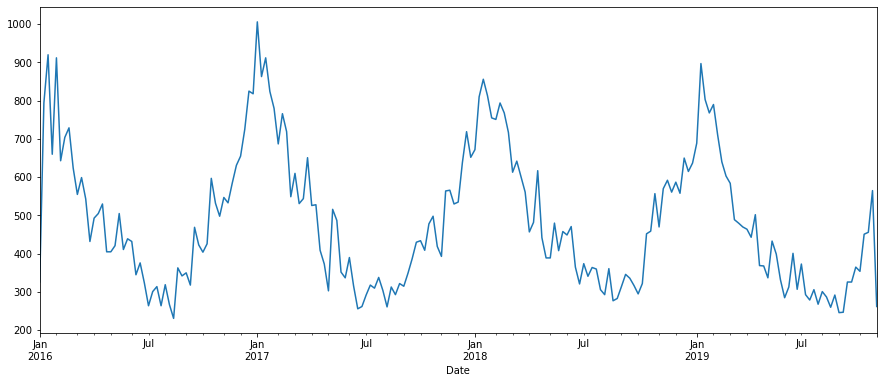

In [34]:
y.plot(figsize=(15, 6))
plt.show()

In [35]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

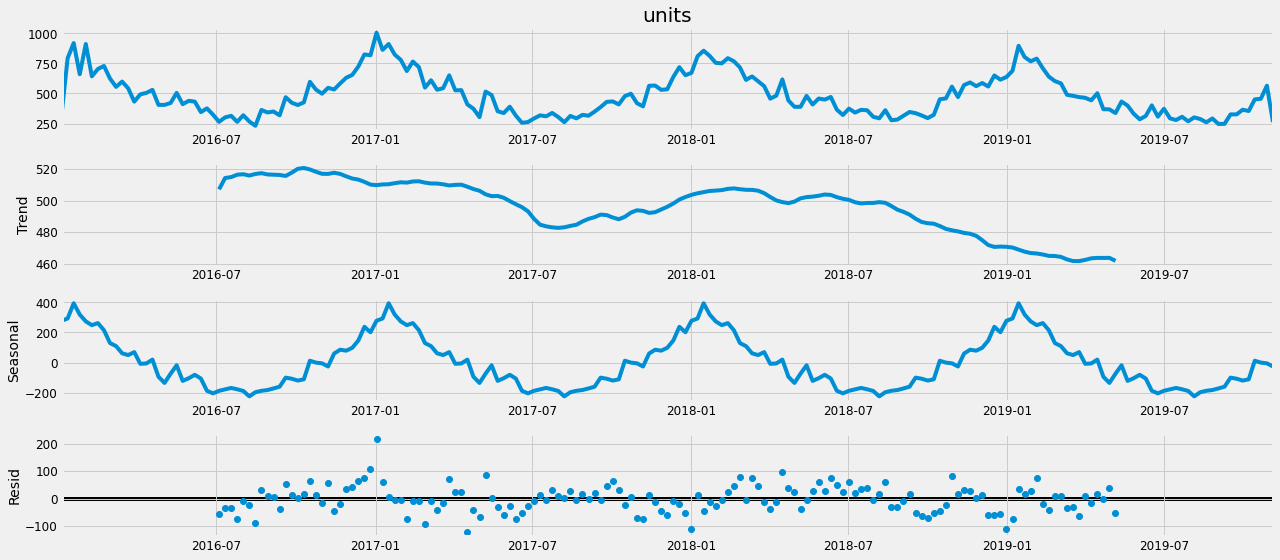

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3067.7656886355476
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2710.1357458658094
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2580.8895550678253
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2350.950595520917
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2576.7464264841133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2561.5115888724727
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2426.846487740163
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2347.9670689983755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2821.627694142716
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2542.1735825322658
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2439.148347616023
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2199.836204375073
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2446.8933525385482
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2362.6583003919354
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2293.0807773360475
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2199.7881067221915
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2306.081830552188
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2136.794298406472

/Users/pinama/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2298.309421256327
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2050.9166150995607
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2148.698159437854
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2150.686732353086
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2091.2142822731767
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2041.1585437778735
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2286.6414640066996
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2129.5833626708686
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2262.2803201549204
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2020.459328051491
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2140.73741099653
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2131.2940053910306
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2091.5443954398484
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2020.0949667210111
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2295.168528496728
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2129.6836529482553
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2265.2373915452818
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2025.814048517651


In [39]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2274      0.082     -2.790      0.005      -0.387      -0.068
ar.S.L12      -0.1112      0.055     -2.024      0.043      -0.219      -0.004
ma.S.L12      -1.1342      0.137     -8.281      0.000      -1.403      -0.866
sigma2      4121.3443    855.408      4.818      0.000    2444.775    5797.914


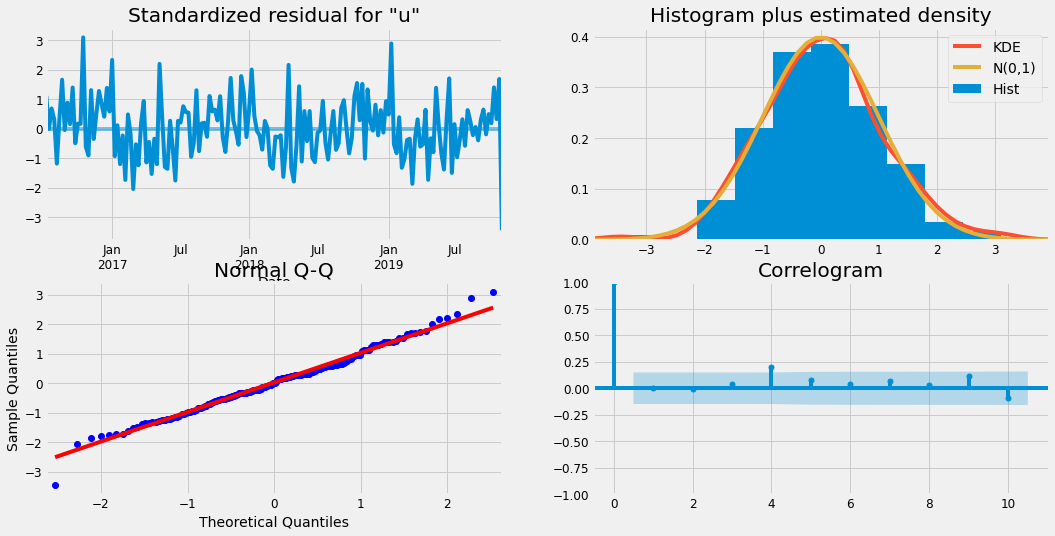

In [40]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

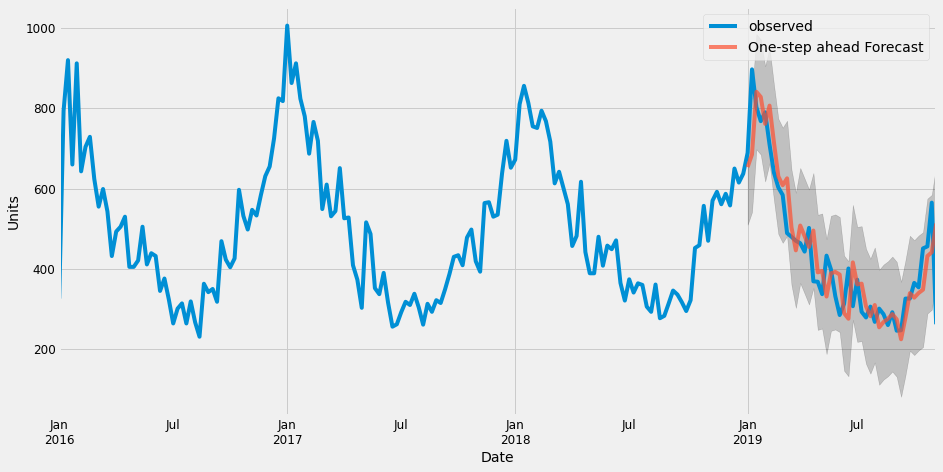

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Units')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-07':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6181.14


In [43]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 78.62


In [44]:
rmspe = np.sqrt(np.mean(np.square(((y_forecasted - y_truth) / y_forecasted)), axis=0))
rmspe

0.17590054601920221

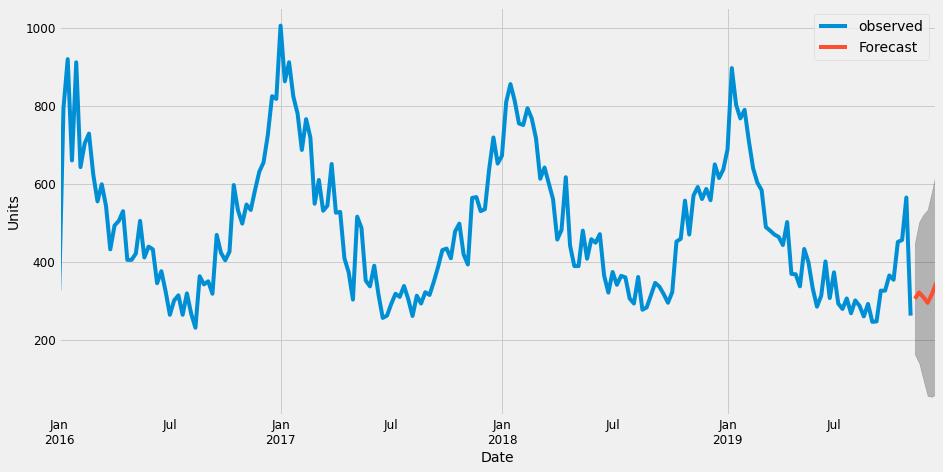

In [45]:
pred_uc = results.get_forecast(steps=6)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Units')
plt.legend()
plt.show()

In [46]:
round(pred_uc.predicted_mean,0)


2019-11-11    305.0
2019-11-18    321.0
2019-11-25    309.0
2019-12-02    295.0
2019-12-09    317.0
2019-12-16    346.0
Freq: W-MON, Name: predicted_mean, dtype: float64

In [47]:
round(pred_ci,0)

,lower units,upper units
2019-11-11,162.0,448.0
2019-11-18,141.0,502.0
2019-11-25,97.0,521.0
2019-12-02,56.0,534.0
2019-12-09,54.0,580.0
2019-12-16,60.0,631.0


-----------------------------------------------------------------------------------------------------

In [48]:
retail=retail.loc[retail["Point-of-Sale_ID"]==1]
retail.head()

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
318,21,13,320,664,1998,1,2016-01-01 00:00:00,2.0,214.0
658,9,178,103,207,650,1,2016-01-01 00:00:00,4.0,2672.0
720,14,28,574,1147,3362,1,2016-01-01 00:00:00,11.0,6445.0
1320,20,31,948,1802,5445,1,2016-01-01 00:00:00,2.0,2790.0
1611,9,178,1294,2401,7431,1,2016-01-01 00:00:00,2.0,1272.0


In [49]:
retail_1_664=retail.loc[retail["ProductName_ID"]==207]
retail_1_664

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,units,values
658,9,178,103,207,650,1,2016-01-01 00:00:00,4.0,2672.0
173441,9,178,103,207,650,1,2016-01-05 00:00:00,2.0,1336.0
281861,9,178,103,207,655,1,2016-01-06 00:00:00,2.0,1950.0
549847,9,178,103,207,652,1,2016-01-11 00:00:00,2.0,1336.0
549970,9,178,103,207,650,1,2016-01-11 00:00:00,2.0,1336.0
...,...,...,...,...,...,...,...,...,...
18947574,9,178,103,207,652,1,2019-10-18,2.0,1180.0
18970188,9,178,103,207,652,1,2019-10-19,2.0,1180.0
19062820,9,178,103,207,650,1,2019-10-21,2.0,1180.0
19179947,9,178,103,207,650,1,2019-10-22,3.0,1770.0


In [50]:
retail_1_664=retail_1_664[["Date","units"]]

In [51]:
retail_1_664['Date'] = pd.to_datetime(retail_1_664['Date']) 

In [52]:
retail_1_664 = retail_1_664.sort_values('Date')
retail_1_664.isnull().sum()

Date     0
units    0
dtype: int64

In [53]:
retail_1_664.dtypes

Date     datetime64[ns]
units           float64
dtype: object

In [54]:
retail_1_664 = retail_1_664.groupby('Date')['units'].sum().reset_index()
retail_1_664

,Date,units
0,2016-01-01,4.0
1,2016-01-05,2.0
2,2016-01-06,2.0
3,2016-01-11,4.0
4,2016-01-12,4.0
...,...,...
594,2019-10-18,2.0
595,2019-10-19,2.0
596,2019-10-21,2.0
597,2019-10-22,3.0


In [55]:
retail_1_664 = retail_1_664.set_index('Date')
retail_1_664.index

DatetimeIndex(['2016-01-01', '2016-01-05', '2016-01-06', '2016-01-11',
               '2016-01-12', '2016-01-15', '2016-01-17', '2016-01-19',
               '2016-01-20', '2016-01-21',
               ...
               '2019-10-08', '2019-10-10', '2019-10-13', '2019-10-15',
               '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-21',
               '2019-10-22', '2019-10-28'],
              dtype='datetime64[ns]', name='Date', length=599, freq=None)

In [56]:
y = retail_1_664['units'].resample('W-MON').sum()
y['2016':]

Date
2016-01-04     4.0
2016-01-11     8.0
2016-01-18    12.0
2016-01-25    17.0
2016-02-01    14.0
              ... 
2019-09-30    11.0
2019-10-07     2.0
2019-10-14     7.0
2019-10-21    15.0
2019-10-28     6.0
Freq: W-MON, Name: units, Length: 200, dtype: float64

In [57]:
y['2019':]

Date
2019-01-07     7.0
2019-01-14    17.0
2019-01-21     2.0
2019-01-28     6.0
2019-02-04     2.0
2019-02-11    15.0
2019-02-18     7.0
2019-02-25     6.0
2019-03-04    11.0
2019-03-11     8.0
2019-03-18    10.0
2019-03-25     3.0
2019-04-01     4.0
2019-04-08    14.0
2019-04-15     4.0
2019-04-22     7.0
2019-04-29    13.0
2019-05-06    10.0
2019-05-13     9.0
2019-05-20     2.0
2019-05-27     7.0
2019-06-03    13.0
2019-06-10     9.0
2019-06-17    12.0
2019-06-24    11.0
2019-07-01     4.0
2019-07-08     4.0
2019-07-15    11.0
2019-07-22     7.0
2019-07-29     9.0
2019-08-05     8.0
2019-08-12     2.0
2019-08-19    11.0
2019-08-26    14.0
2019-09-02    10.0
2019-09-09     6.0
2019-09-16     6.0
2019-09-23    11.0
2019-09-30    11.0
2019-10-07     2.0
2019-10-14     7.0
2019-10-21    15.0
2019-10-28     6.0
Freq: W-MON, Name: units, dtype: float64

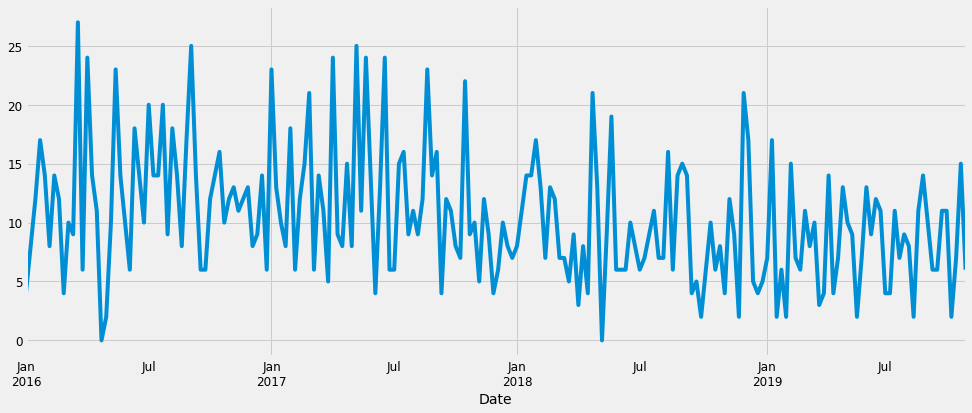

In [58]:
y.plot(figsize=(15, 6))
plt.show()

In [59]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

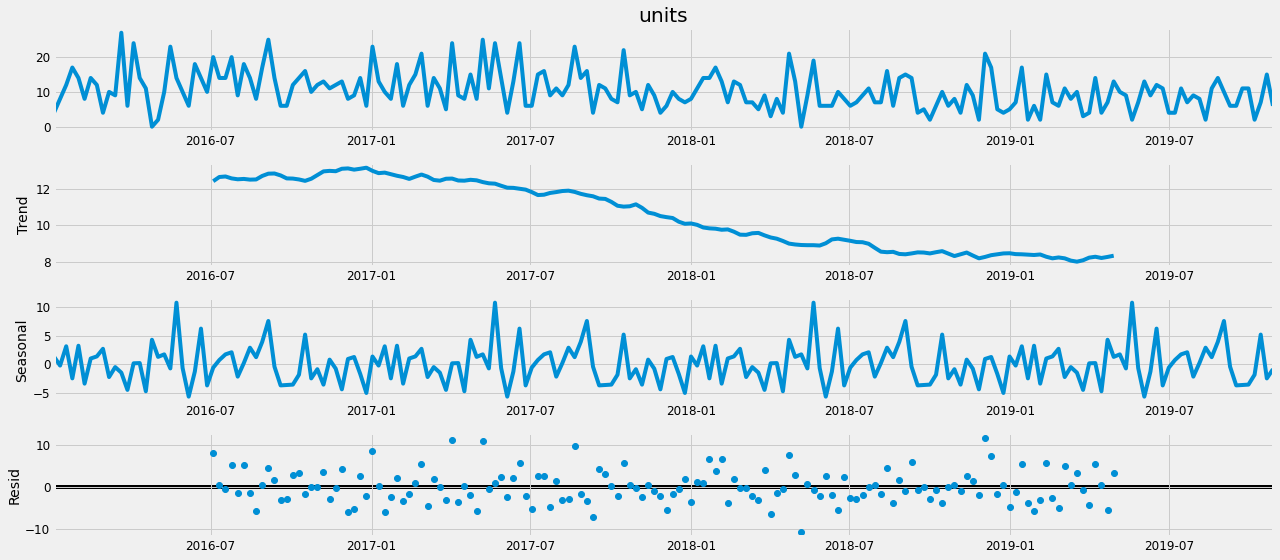

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [62]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1549.9600250414255
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1357.1515648309003
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1264.231313433801
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1110.5361029895157
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1250.8486807557779
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1183.5846206310412
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1143.593721703803
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1112.535984155545
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1447.584463976844
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1301.7002763231503
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1254.5284995566212
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1106.9366196124702
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1252.4742502100853
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1177.39654003188
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1144.2199263149353
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1108.93605258676
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1361.4542847833366
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1269.188096118391
A

In [63]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0756      0.078     -0.968      0.333      -0.229       0.078
ma.L1         -0.9878      0.058    -16.964      0.000      -1.102      -0.874
ma.S.L12      -0.8478      0.077    -11.036      0.000      -0.998      -0.697
sigma2        29.6245      4.160      7.122      0.000      21.472      37.777


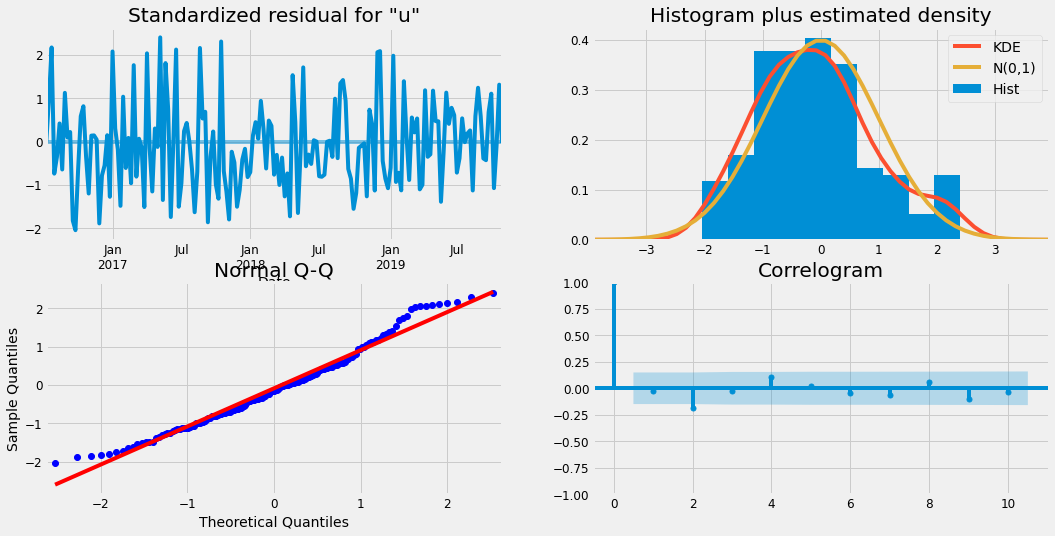

In [64]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

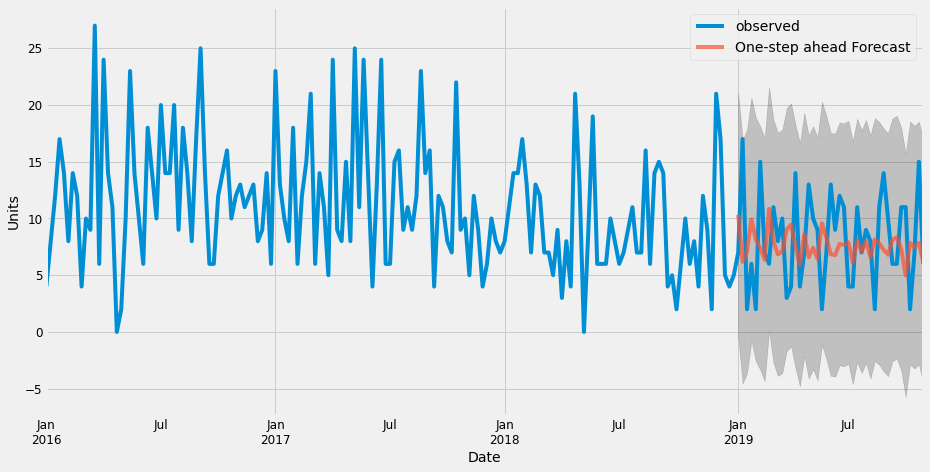

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Units')
plt.legend()
plt.show()

In [66]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-07':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 20.64


In [67]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.54


In [68]:
rmspe = np.sqrt(np.mean(np.square(((y_forecasted - y_truth) / y_forecasted)), axis=0))
rmspe

0.6206903775573583

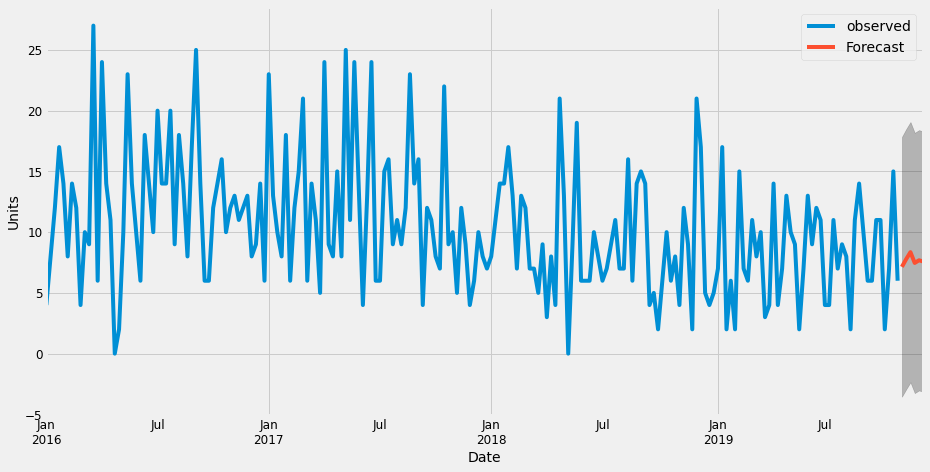

In [69]:
pred_uc = results.get_forecast(steps=6)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Units')
plt.legend()
plt.show()

In [70]:
round(pred_uc.predicted_mean,0)


2019-11-04    7.0
2019-11-11    8.0
2019-11-18    8.0
2019-11-25    7.0
2019-12-02    8.0
2019-12-09    8.0
Freq: W-MON, Name: predicted_mean, dtype: float64

In [71]:
round(pred_ci,0)

,lower units,upper units
2019-11-04,-4.0,18.0
2019-11-11,-3.0,18.0
2019-11-18,-2.0,19.0
2019-11-25,-3.0,18.0
2019-12-02,-3.0,18.0
2019-12-09,-3.0,18.0
